### Analyse the Publications data from Kenya

So we managed to download about 25,000 paper abstracts with meta-data from Kenyan Authors. Now we need to makse sense of these data and identify trends. We are asking questions like:

1. Changes in the number of papers published over time (Yearly)
2. Changes in the number of open acces papers over the years (Keep in mind that access of the lack thereof maybe linked to embargo periods)
3. Colaboration trends (How can we get this information?
4. What else can we find out?

In [1]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/PMID_PMC_Journal_Year.csv', index_col='pmid', usecols=['pmid','pmd','journal','year'])

Convert the year column to date time format

In [3]:
data['date'] = pd.to_datetime(data['year'], errors='coerce')
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month

### Popular Journals for Kenyan Authors

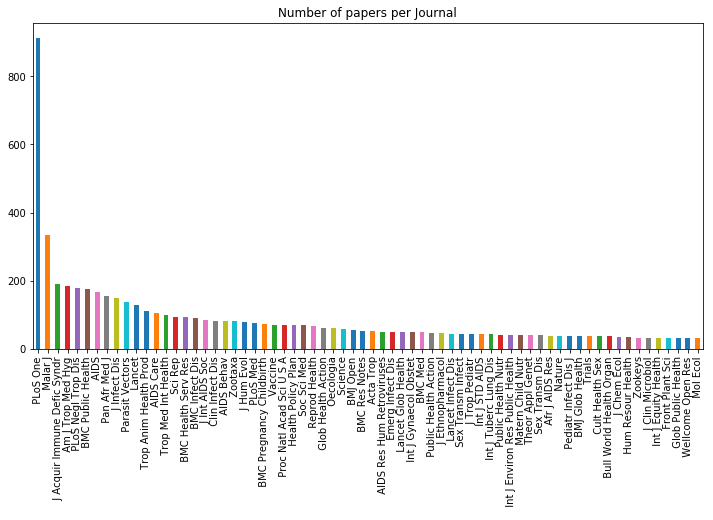

In [4]:
plot_journals = data.journal.value_counts()[data.journal.value_counts() > 30]
plot_journals.plot(kind='bar', title='Number of papers per Journal', figsize=(12, 6))
plt.savefig('../plots/papers_per_jornal.png')  # saves the current figure

From the figure above, we can observe that Plos One is the most popular Journal for Kenyan Authors. This is followed in a distant second by Malaria Journal. It is also quite interesting to see that the Welcome Open Research has gained popularity for Kenyan Authors. Most of these are journals specific to the diseases affecting Africa: Malaria and Negelected Tropical dieseases. 


### Number of Journals per Year

Now we need to check if the number of Journals Published By Kenyans over the years. 

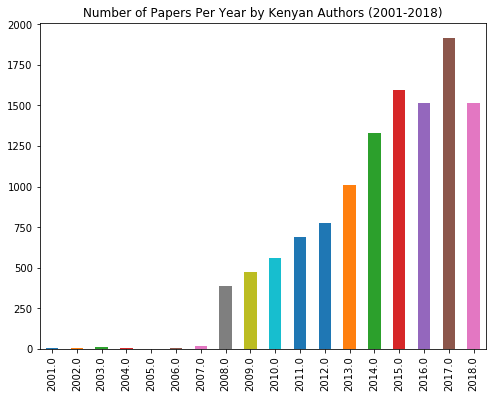

In [5]:
data[(data.year > 2000) & (data.year < 2019)]['year'].\
value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers Per Year by Kenyan Authors (2001-2018)',
                                 figsize=(8, 6))
plt.savefig('../plots/papers_per_year.png')  # saves the current figure

Either we are missing some data or there was a drastic increase in the number of papers published by Kenyan authors after 2007. Why?

#### Are the published papers openly accessible?

Having established the

In [6]:
import math

def isOpen(line):
    try:
        if math.isnan(line):
            line = 'closed'
    except TypeError:
        line = 'open'
    return line

# Create a new column that checks whether the paper is open or not
data['isopen'] = data.pmd.apply(lambda l:isOpen(l))

In [8]:
grouped = data.groupby(['year','isopen'])

In [12]:
data.sort_values(by='date', ascending=False)

,pmd,journal,year,date,month,isopen
pmid,,,,,,
28928185,PMC5623534,Lancet,2018.0,2018-12-23,12.0,open
28927428,PMC5606043,Lancet,2018.0,2018-12-23,12.0,open
30027825,NaN,Reprod Health Matters,2018.0,2018-12-01,12.0,closed
30058955,NaN,Reprod Health Matters,2018.0,2018-12-01,12.0,closed
29903039,PMC6003001,Sci Total Environ,2018.0,2018-11-15,11.0,open
29792207,PMC5966901,Paediatr Int Child Health,2018.0,2018-11-01,11.0,open
29792180,PMC5966855,Paediatr Int Child Health,2018.0,2018-11-01,11.0,open
29792077,NaN,Paediatr Int Child Health,2018.0,2018-11-01,11.0,closed
29752836,NaN,Sci Total Environ,2018.0,2018-10-01,10.0,closed


In [24]:
!grep 'doi:' ../Data/abstracts.txt| \
sed 's/;/./g' |cut -f 2,3 -d'.' | \
cut -f1 -d':' >../Data/Journal_Year.txt

In [30]:
!grep -v 'PMID:' ../Data/abstracts.txt

25254


In [26]:
!wc -l ../Data/Journal_Year.txt

12305 ../Data/Journal_Year.txt


In [33]:
!tail ../Data/PMID_PMC_Journal_Year.txt

29012815	NA	
21260121	NA	
20914027	NA	
19989630	NA	
17104469	NA	
28897723	NA	
29009979	NA	
20475023	NA	
20772648	NA	
29011364	NA	


In [13]:
!efetch -db pubmed -id '28928185' \
-format xml | xtract \
-pattern ArticleIdList -element ArticleId |cut -f1,4

28928185	PMC5623534


In [22]:
!grep '28928185' ../Data/PMID_PMC_Journal_Year.txt

28928185	PMC5623534	  Lancet	  2018 Dec 23
